In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()

zip_ref.close()

--2022-03-04 19:14:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   129MB/s    in 0.8s    

2022-03-04 19:14:20 (129 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os

for dirpath,dirname,filename in os.walk("pizza_steak"):
  print({f"Directories {len(dirname)}, images {len(filename)}, path {dirpath}"})

{'Directories 2, images 0, path pizza_steak'}
{'Directories 2, images 0, path pizza_steak/test'}
{'Directories 0, images 250, path pizza_steak/test/steak'}
{'Directories 0, images 250, path pizza_steak/test/pizza'}
{'Directories 2, images 0, path pizza_steak/train'}
{'Directories 0, images 750, path pizza_steak/train/steak'}
{'Directories 0, images 750, path pizza_steak/train/pizza'}


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}")

  return img

Image shape:(512, 512, 3)


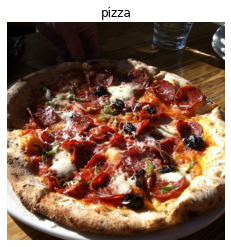

In [ ]:
img = view_random_image("pizza_steak/train/","pizza")

In [ ]:
img

array([[[ 16,   8,   5],
        [ 16,   8,   5],
        [ 16,   8,   5],
        ...,
        [ 94, 104,  95],
        [ 98, 105,  98],
        [ 96, 103,  96]],

       [[ 16,   8,   5],
        [ 16,   8,   5],
        [ 15,   7,   4],
        ...,
        [ 90, 100,  92],
        [ 89,  96,  89],
        [ 93, 100,  93]],

       [[ 13,   8,   4],
        [ 13,   8,   4],
        [ 13,   8,   4],
        ...,
        [ 92, 102,  94],
        [ 98, 105,  98],
        [ 99, 106,  99]],

       ...,

       [[190, 152, 103],
        [190, 150,  99],
        [198, 158, 107],
        ...,
        [ 14,   4,   3],
        [ 14,   4,   3],
        [ 15,   5,   4]],

       [[187, 149, 100],
        [200, 160, 111],
        [213, 173, 122],
        ...,
        [ 14,   4,   3],
        [ 13,   3,   2],
        [ 13,   3,   4]],

       [[185, 147,  98],
        [211, 173, 124],
        [224, 184, 133],
        ...,
        [ 13,   3,   2],
        [ 13,   3,   4],
        [ 12,   2,   3]]

In [ ]:
img/255.

array([[[0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        ...,
        [0.36862745, 0.40784314, 0.37254902],
        [0.38431373, 0.41176471, 0.38431373],
        [0.37647059, 0.40392157, 0.37647059]],

       [[0.0627451 , 0.03137255, 0.01960784],
        [0.0627451 , 0.03137255, 0.01960784],
        [0.05882353, 0.02745098, 0.01568627],
        ...,
        [0.35294118, 0.39215686, 0.36078431],
        [0.34901961, 0.37647059, 0.34901961],
        [0.36470588, 0.39215686, 0.36470588]],

       [[0.05098039, 0.03137255, 0.01568627],
        [0.05098039, 0.03137255, 0.01568627],
        [0.05098039, 0.03137255, 0.01568627],
        ...,
        [0.36078431, 0.4       , 0.36862745],
        [0.38431373, 0.41176471, 0.38431373],
        [0.38823529, 0.41568627, 0.38823529]],

       ...,

       [[0.74509804, 0.59607843, 0.40392157],
        [0.74509804, 0.58823529, 0.38823529],
        [0.77647059, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_1 = tf.keras.Sequential([
               tf.keras.layers.Conv2D(filters=10,
                                       kernel_size=3,
                                       activation="relu",
                                       input_shape=(224,224,3)),
               tf.keras.layers.Conv2D(10,3,activation="relu"),
               tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
               tf.keras.layers.Conv2D(10,3,activation="relu"),
               tf.keras.layers.Conv2D(10,3,activation="relu"),
               tf.keras.layers.MaxPool2D(2),
               tf.keras.layers.Flatten(),
               tf.keras.layers.Dense(1, activation="sigmoid")                                
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 262ms/step - loss: 0.5427 - accuracy: 0.7087 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4165 - accuracy: 0.8093 - val_loss: 0.3584 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3905 - accuracy: 0.8327 - val_loss: 0.3269 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3506 - accuracy: 0.8540 - val_loss: 0.3921 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3192 - accuracy: 0.8707 - val_loss: 0.3455 - val_accuracy: 0.8540


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(224,224,3)),                   
            tf.keras.layers.Dense(4,activation="relu"),
            tf.keras.layers.Dense(4,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid")                   
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 1.5706 - accuracy: 0.5127 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(224,224,3)),                   
            tf.keras.layers.Dense(100,activation="relu"),
            tf.keras.layers.Dense(100,activation="relu"),
            tf.keras.layers.Dense(100,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid")                   
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 2.6578 - accuracy: 0.6487 - val_loss: 1.8993 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 1.0933 - accuracy: 0.6907 - val_loss: 0.5556 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6951 - accuracy: 0.7253 - val_loss: 0.4809 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5524 - accuracy: 0.7727 - val_loss: 0.6460 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4676 - accuracy: 0.8000 - val_loss: 0.4285 - val_accuracy: 0.7900


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape:(384, 512, 3)
Image shape:(512, 512, 3)


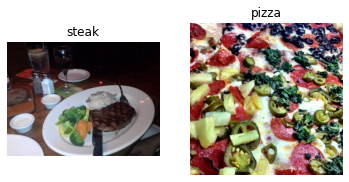

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-04 19:17:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   178MB/s    in 0.6s    

2022-03-04 19:17:38 (178 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



Image shape:(307, 512, 3)
Image shape:(512, 512, 3)


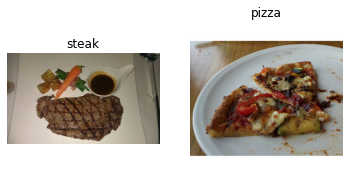

In [ ]:
import os
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
   Conv2D(10, 3, activation='relu'),
   Conv2D(10, 3, activation='relu'),
   Flatten(),
   Dense(1, activation='sigmoid')        
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 257ms/step - loss: 1.0697 - accuracy: 0.7060 - val_loss: 0.4178 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4224 - accuracy: 0.8133 - val_loss: 0.3976 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3179 - accuracy: 0.8667 - val_loss: 0.4171 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.1747 - accuracy: 0.9453 - val_loss: 0.4579 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0566 - accuracy: 0.9880 - val_loss: 0.4894 - val_accuracy: 0.8120


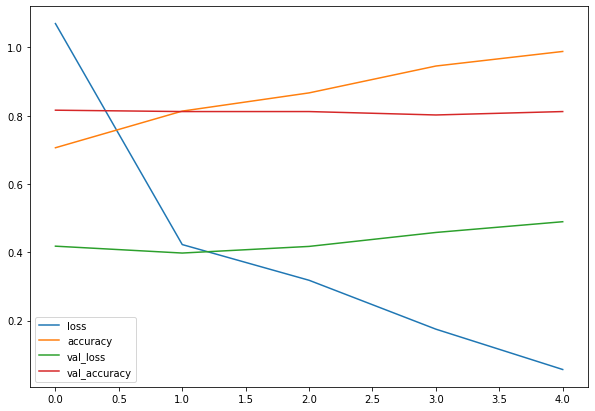

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

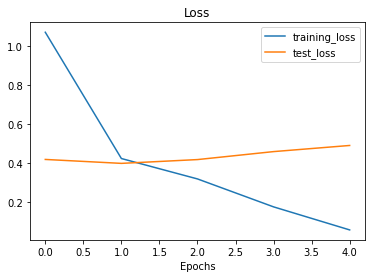

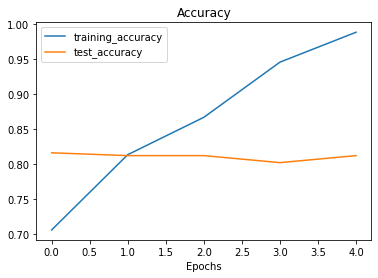

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5 = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
        MaxPooling2D(pool_size=2),
        Conv2D(10, 3, activation='relu'),
        MaxPooling2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(1, activation='sigmoid')          
])


In [ ]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5898 - accuracy: 0.6773 - val_loss: 0.4561 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4744 - accuracy: 0.7867 - val_loss: 0.3820 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4524 - accuracy: 0.7993 - val_loss: 0.3796 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4447 - accuracy: 0.8040 - val_loss: 0.3966 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4136 - accuracy: 0.8187 - val_loss: 0.3344 - val_accuracy: 0.8660


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

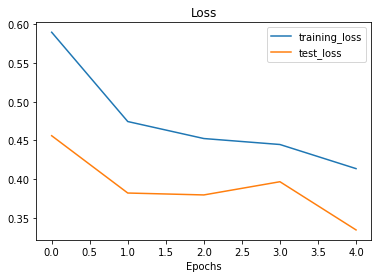

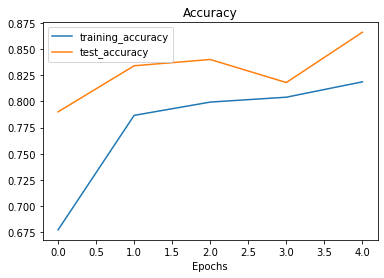

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()

Text(0.5, 1.0, 'Augmented')

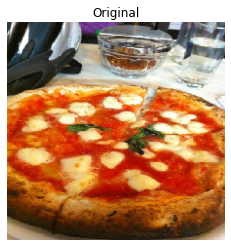

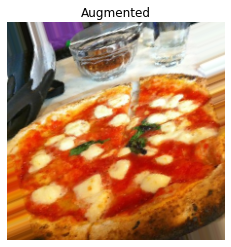

In [ ]:
import random
random_number = random.randint(0,32)

image = images[random_number]
image_aug = images_augmented[random_number]

plt.imshow(image)
plt.axis(False)
plt.title("Original")
plt.figure()
plt.imshow(image_aug)
plt.axis(False)
plt.title("Augmented")

In [ ]:
model_6 = Sequential([
      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
      MaxPooling2D(pool_size=2),
      Conv2D(10,3,activation='relu'),
      MaxPooling2D(),
      Conv2D(10,3,activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(1, activation='sigmoid')                
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=train_data_augmented,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 32s 669ms/step - loss: 0.7167 - accuracy: 0.5600 - val_loss: 0.7325 - val_accuracy: 0.0078
Epoch 2/5
47/47 [==============================] - 31s 653ms/step - loss: 0.7003 - accuracy: 0.4433 - val_loss: 0.6500 - val_accuracy: 0.9648
Epoch 3/5
47/47 [==============================] - 30s 652ms/step - loss: 0.6823 - accuracy: 0.5287 - val_loss: 0.6699 - val_accuracy: 0.7754
Epoch 4/5
47/47 [==============================] - 31s 652ms/step - loss: 0.6548 - accuracy: 0.6413 - val_loss: 0.7037 - val_accuracy: 0.6621
Epoch 5/5
47/47 [==============================] - 32s 685ms/step - loss: 0.6543 - accuracy: 0.6140 - val_loss: 0.7223 - val_accuracy: 0.5332


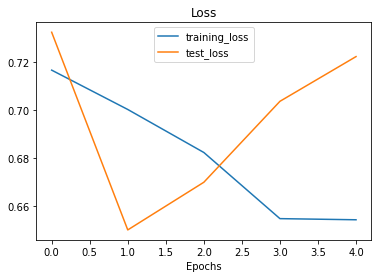

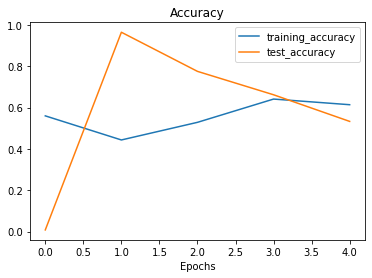

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode='binary',
                                                                            batch_size=32, 
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
       Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
       MaxPooling2D(pool_size=2),
       Conv2D(10,3,activation='relu'),
       MaxPooling2D(),
       Conv2D(10,3,activation='relu'),
       MaxPooling2D(),
       Flatten(),
       Dense(1, activation='sigmoid')               
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 558ms/step - loss: 0.6353 - accuracy: 0.6153 - val_loss: 0.5060 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5180 - accuracy: 0.7487 - val_loss: 0.3796 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4875 - accuracy: 0.7687 - val_loss: 0.3421 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.4746 - accuracy: 0.7733 - val_loss: 0.3420 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4705 - accuracy: 0.7840 - val_loss: 0.3601 - val_accuracy: 0.8380


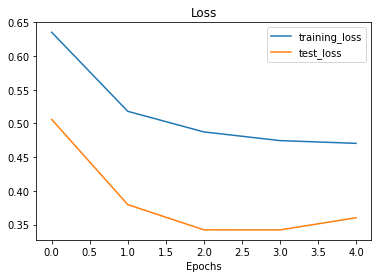

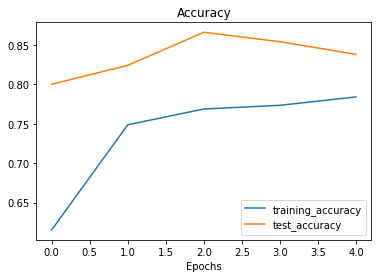

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8  = Sequential([
      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
      Conv2D(10,3,activation='relu'),
      MaxPooling2D(pool_size=2),
      Conv2D(10,3,activation='relu'),
      Conv2D(10,3,activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(1, activation='sigmoid')                 
])

model_8.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 575ms/step - loss: 0.6164 - accuracy: 0.6507 - val_loss: 0.4411 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.5665 - accuracy: 0.7007 - val_loss: 0.4291 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 27s 565ms/step - loss: 0.5298 - accuracy: 0.7460 - val_loss: 0.4283 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 27s 565ms/step - loss: 0.5345 - accuracy: 0.7327 - val_loss: 0.4650 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 26s 559ms/step - loss: 0.4976 - accuracy: 0.7667 - val_loss: 0.3885 - val_accuracy: 0.8340


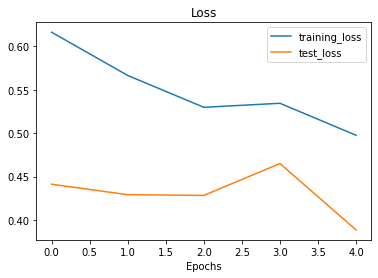

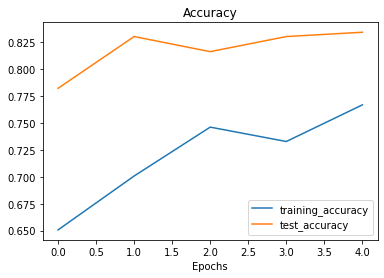

In [ ]:
plot_loss_curves(history_8)

--2022-03-04 19:43:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-03-04 19:43:03 (33.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

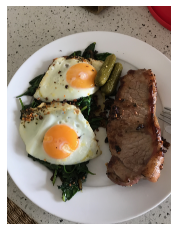

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.io.decode_image(img, channels=3)

  img = tf.image.resize(img, size=[img_shape, img_shape])

  img = img/255.
  return img


In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_8.predict(steak)

ValueError: ignored

In [ ]:
steak = tf.expand_dims(steak,axis=0)

In [ ]:
pred = model_8.predict(steak)
pred

array([[0.7401151]], dtype=float32)

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

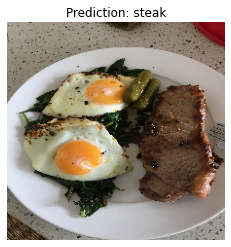

In [ ]:
pred_and_plot(model_8, '03-steak.jpeg', class_names)

In [ ]:
tf.round(pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
tf.round(pred)[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

--2022-03-04 20:02:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-03-04 20:02:48 (42.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



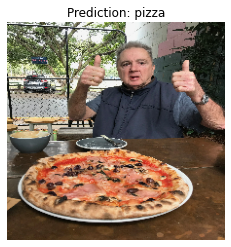

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-05 18:58:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.11.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  86.5MB/s    in 4.1s    

2022-03-05 18:58:41 (121 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

for dirpath,dirs,files in os.walk('10_food_classes_all_data'):
  print(f'{dirpath}: {len(dirs)} {len(files)}')

10_food_classes_all_data: 2 0
10_food_classes_all_data/test: 10 0
10_food_classes_all_data/test/steak: 0 250
10_food_classes_all_data/test/ice_cream: 0 250
10_food_classes_all_data/test/fried_rice: 0 250
10_food_classes_all_data/test/chicken_wings: 0 250
10_food_classes_all_data/test/chicken_curry: 0 250
10_food_classes_all_data/test/sushi: 0 250
10_food_classes_all_data/test/ramen: 0 250
10_food_classes_all_data/test/pizza: 0 250
10_food_classes_all_data/test/grilled_salmon: 0 250
10_food_classes_all_data/test/hamburger: 0 250
10_food_classes_all_data/train: 10 0
10_food_classes_all_data/train/steak: 0 750
10_food_classes_all_data/train/ice_cream: 0 750
10_food_classes_all_data/train/fried_rice: 0 750
10_food_classes_all_data/train/chicken_wings: 0 750
10_food_classes_all_data/train/chicken_curry: 0 750
10_food_classes_all_data/train/sushi: 0 750
10_food_classes_all_data/train/ramen: 0 750
10_food_classes_all_data/train/pizza: 0 750
10_food_classes_all_data/train/grilled_salmon: 0 750

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape:(384, 512, 3)


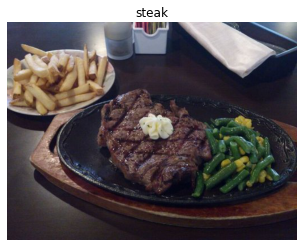

In [ ]:
import random

img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

model_9 = Sequential([
            Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
            Conv2D(10,3,activation='relu'),
            MaxPooling2D(),
            Conv2D(10,3,activation='relu'),
            Conv2D(10,3,activation='relu'),
            MaxPooling2D(),
            Flatten(),
            Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])


In [ ]:
history_9=model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 189ms/step - loss: 2.1266 - accuracy: 0.2251 - val_loss: 2.0131 - val_accuracy: 0.2680
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.9160 - accuracy: 0.3353 - val_loss: 1.9432 - val_accuracy: 0.3312
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.6112 - accuracy: 0.4515 - val_loss: 2.0098 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 1.0815 - accuracy: 0.6353 - val_loss: 2.2306 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.4990 - accuracy: 0.8439 - val_loss: 3.2297 - val_accuracy: 0.2952


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 3.2297 - accuracy: 0.2952


[3.229698896408081, 0.295199990272522]

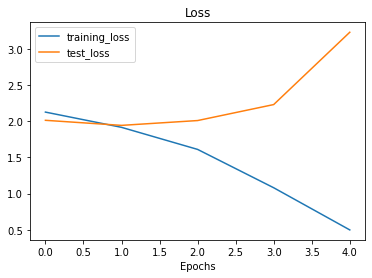

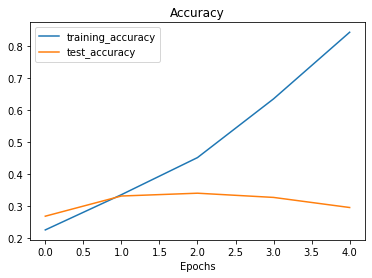

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_10 = Sequential([
         Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
         MaxPooling2D(),
         Conv2D(10,3,activation='relu'),
         MaxPooling2D(),
         Flatten(),
         Dense(10,activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 179ms/step - loss: 2.1338 - accuracy: 0.2299 - val_loss: 1.9482 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.7268 - accuracy: 0.4136 - val_loss: 1.9713 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.3077 - accuracy: 0.5801 - val_loss: 2.0098 - val_accuracy: 0.3368
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 0.8503 - accuracy: 0.7417 - val_loss: 2.2541 - val_accuracy: 0.3288
Epoch 5/5
235/235 [==============================] - 42s 179ms/step - loss: 0.4774 - accuracy: 0.8765 - val_loss: 2.5874 - val_accuracy: 0.3188


In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.


In [ ]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11=model_11.fit(train_data_augmented,
             epochs=50,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 106s 452ms/step - loss: 2.3395 - accuracy: 0.1701 - val_loss: 2.0911 - val_accuracy: 0.2464
Epoch 2/50
235/235 [==============================] - 106s 451ms/step - loss: 2.1257 - accuracy: 0.2369 - val_loss: 2.0014 - val_accuracy: 0.2764
Epoch 3/50
235/235 [==============================] - 106s 451ms/step - loss: 2.0845 - accuracy: 0.2619 - val_loss: 1.9549 - val_accuracy: 0.3100
Epoch 4/50
235/235 [==============================] - 106s 452ms/step - loss: 2.0628 - accuracy: 0.2673 - val_loss: 1.9407 - val_accuracy: 0.3156
Epoch 5/50
235/235 [==============================] - 106s 451ms/step - loss: 2.0275 - accuracy: 0.2871 - val_loss: 1.9079 - val_accuracy: 0.3400
Epoch 6/50
235/235 [==============================] - 106s 452ms/step - loss: 2.0059 - accuracy: 0.2921 - val_loss: 1.9256 - val_accuracy: 0.3284
Epoch 7/50
235/235 [==============================] - 106s 452ms/step - loss: 1.9904 - accuracy: 0.3039 - val_loss: 1.8858 -

KeyboardInterrupt: ignored

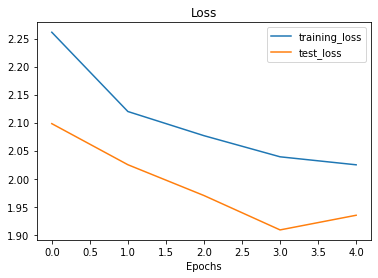

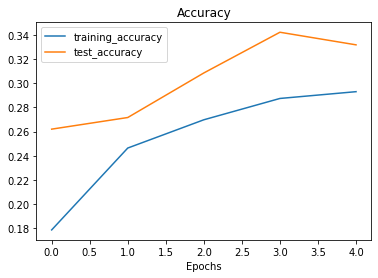

In [ ]:
plot_loss_curves(history_11)

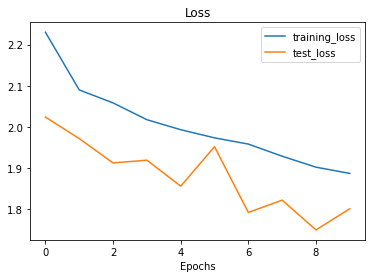

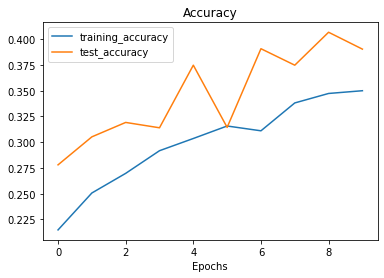

In [ ]:
plot_loss_curves(history_11)

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

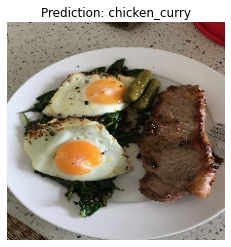

In [ ]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

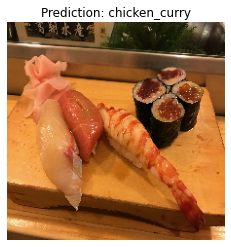

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

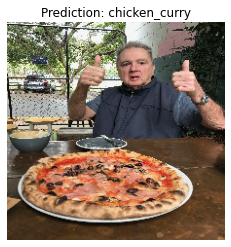

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

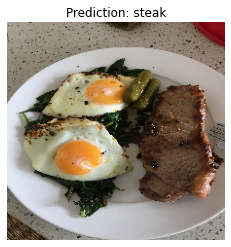

In [ ]:
pred_and_plot(model_15, "03-steak.jpeg", class_names)

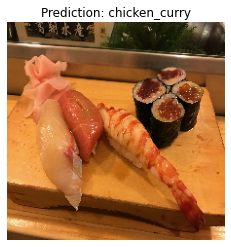

In [ ]:
pred_and_plot(model_15, "03-sushi.jpeg", class_names)

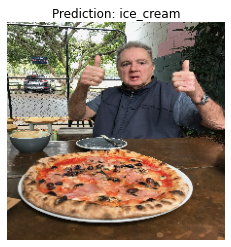

In [ ]:
pred_and_plot(model_15, "03-pizza-dad.jpeg", class_names)

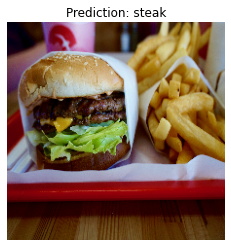

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [ ]:
model_15 = Sequential([
         Conv2D(64,3,activation='relu',input_shape=(224,224,3)),
         MaxPooling2D(),
         Conv2D(64,3,activation='relu'),
         MaxPooling2D(),
         Conv2D(64,3,activation='relu'),
         MaxPooling2D(),
         Flatten(),
         Dense(100,activation='relu'),
         Dense(100,activation='relu'),
         Dense(10,activation='softmax')
])

model_15.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_15 = model_15.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 478ms/step - loss: 2.2527 - accuracy: 0.1480 - val_loss: 2.0579 - val_accuracy: 0.2672
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0928 - accuracy: 0.2444 - val_loss: 1.9582 - val_accuracy: 0.2960
Epoch 3/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0303 - accuracy: 0.2737 - val_loss: 1.9062 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 112s 474ms/step - loss: 1.9698 - accuracy: 0.3073 - val_loss: 1.8780 - val_accuracy: 0.3476
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 1.9100 - accuracy: 0.3325 - val_loss: 1.7607 - val_accuracy: 0.3944


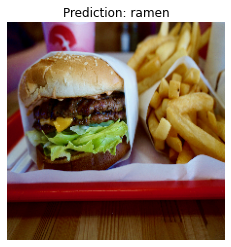

In [ ]:
pred_and_plot(model_15, "03-hamburger.jpeg", class_names)

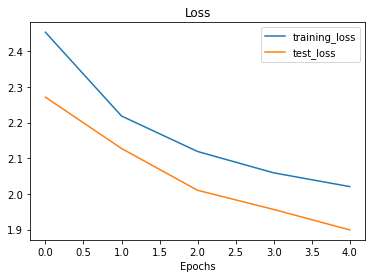

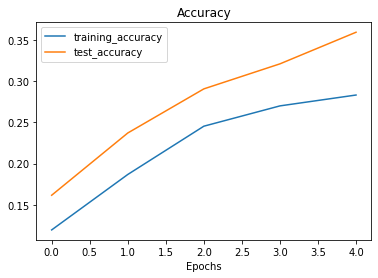

In [ ]:
plot_loss_curves(history_15)